In [290]:
#import 
from matplotlib import font_manager, rc
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

#그래프의 마이너스 표시가능 설정
matplotlib.rcParams['axes.unicode_minus']=False

In [291]:
import tensorflow as tf

In [292]:
# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [293]:
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17529906610890492891,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10843261504
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10765107773235317431
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6"]

In [294]:
tf.test.is_gpu_available()

True

In [295]:
result = pd.read_csv(r'C:\Users\kimms\KBO\dataset\statiz_origin.csv')

In [296]:
# 1루타 feature 생성
result['1타'] = result['안타'] - result['2타'] - result['3타'] - result['홈런']

In [297]:
result

,Unnamed: 0,선수,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+,생일,1타
0,0,이종범94해SS,124,561,499,113,196,27,5,19,290,77,84,15,51,6,14,31,2,1,4,0.393,0.452,0.581,1.033,0.462,198.3,11.77,1970-08-15,145
1,1,테임즈15N1B,142,595,472,130,180,42,5,47,373,140,40,8,103,13,11,91,7,0,7,0.381,0.498,0.790,1.288,0.530,222.3,10.71,1986-11-10,86
2,2,심정수03현RF,133,601,460,110,154,16,1,53,331,142,6,2,124,9,17,63,14,0,8,0.335,0.478,0.720,1.197,0.498,210.7,10.19,1975-05-05,84
3,3,이종범97해SS,125,577,484,112,157,28,3,30,281,74,64,15,87,3,30,49,9,0,3,0.324,0.428,0.581,1.009,0.431,173.2,9.70,1970-08-15,96
4,4,이종범96해SS,113,525,449,94,149,28,1,25,254,76,57,12,67,7,15,39,4,0,2,0.332,0.425,0.566,0.991,0.440,184.6,9.52,1970-08-15,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,10032,김헌곤22삼CF,80,239,224,18,43,8,0,1,54,20,3,1,9,1,0,22,10,2,3,0.192,0.224,0.241,0.465,0.217,24.6,-1.58,1988-11-09,34
10033,10033,김영진99삼C,97,212,189,8,26,4,0,2,36,13,0,0,10,1,0,45,7,12,0,0.138,0.185,0.190,0.376,0.166,-16.1,-1.60,1972-04-09,20
10034,10034,나종덕18롯C,106,203,177,15,22,3,0,2,31,11,0,0,12,5,0,85,2,9,0,0.124,0.201,0.175,0.376,0.175,-15.1,-1.71,1998-03-16,17
10035,10035,이종범07KRF,84,282,253,23,44,6,0,1,53,18,3,2,13,2,0,25,6,10,4,0.174,0.217,0.209,0.426,0.199,8.0,-2.04,1970-08-15,37


In [298]:
# 이름 분리 해서, '이름' column 추가
result['이름'] = result['선수'].str.findall("^[ㄱ-힣]+").apply(lambda x: x[0])

# 기존 '선수' column 에 있던 이름 정보 제거
result['선수'] = result.apply(lambda x: x['선수'].replace(x['이름'], ''), axis=1)

In [299]:
# '시즌' column 생성
result['시즌'] = result['선수'].apply(lambda x: x[:2])

# 기존 '선수' column 에 있던 시즌 정보 제거
result['선수'] = result.apply(lambda x: x['선수'].replace(x['시즌'],''), axis=1)

# 년도를 4자리 숫자로 바꾸어주기 ex) 98 -&gt; 1998, 15 -&gt; 2015
result['시즌'] = result['시즌'].apply(lambda x: int("20"+ x) if int(x) < 30 else int("19"+x))

In [300]:
# 포지션
position = ['1B', '2B', '3B', 'SS', 'C', 'RF', 'LF', 'CF', 'DH'] 

# 포지션 여부 확인
result['포지션여부'] = result['선수'].apply(lambda x : (np.isin(x[-2:], position) or np.isin(x[-1:], position))) 

# 포지션 분리
result['포지션'] = result['선수'].apply(lambda x: x[-2:] if x[-2:] in position else x[-1:])

#포지션이 기록 되어 있지 않으면, nan값 넣기 
result.loc[result['포지션여부']==False, '포지션'] = np.nan

#statiz 사이트에, 2015시즌 조홍석 데이터 생일 x  조홍석 생일 수기추가 
result.loc[(result.이름 =='조홍석'),'생일']

3937    1990-02-23
7566    1990-02-23
8025    1990-02-23
9222    1990-02-23
9854    1990-02-23
Name: 생일, dtype: object

In [301]:
result.loc[(result.이름 =='조홍석')&(result.시즌 ==2015),'생일'] = '1990-02-23'

result[(result.이름 =='조홍석')&(result.시즌 ==2015)].생일

7566    1990-02-23
Name: 생일, dtype: object

In [302]:
# 팀 & 나이 column 생성
result['팀'] = result.apply(lambda x: x['선수'].replace(x['포지션'],'') if type(x['포지션'])==str else x['선수'], axis=1)
result['나이'] = result.apply(lambda x: x['시즌'] - int(x['생일'][:4]) + 1, axis=1)

# 선수별 고유 아이디 부여
info = result[['이름', '생일']].apply(lambda x: tuple(x), axis=1)

player_id = {}
for i,j in enumerate(info.unique()):
    player_id[j] = i
    
result['ID'] = result.apply(lambda x: player_id[tuple([x['이름'], x['생일']])], axis=1)

In [303]:
# '선수'라는 이름을 가진 열을 삭제합니다.
result.drop(columns=['선수'], inplace=True)

In [304]:
result

,Unnamed: 0,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+,생일,1타,이름,시즌,포지션여부,포지션,팀,나이,ID
0,0,124,561,499,113,196,27,5,19,290,77,84,15,51,6,14,31,2,1,4,0.393,0.452,0.581,1.033,0.462,198.3,11.77,1970-08-15,145,이종범,1994,True,SS,해,25,0
1,1,142,595,472,130,180,42,5,47,373,140,40,8,103,13,11,91,7,0,7,0.381,0.498,0.790,1.288,0.530,222.3,10.71,1986-11-10,86,테임즈,2015,True,1B,N,30,1
2,2,133,601,460,110,154,16,1,53,331,142,6,2,124,9,17,63,14,0,8,0.335,0.478,0.720,1.197,0.498,210.7,10.19,1975-05-05,84,심정수,2003,True,RF,현,29,2
3,3,125,577,484,112,157,28,3,30,281,74,64,15,87,3,30,49,9,0,3,0.324,0.428,0.581,1.009,0.431,173.2,9.70,1970-08-15,96,이종범,1997,True,SS,해,28,0
4,4,113,525,449,94,149,28,1,25,254,76,57,12,67,7,15,39,4,0,2,0.332,0.425,0.566,0.991,0.440,184.6,9.52,1970-08-15,95,이종범,1996,True,SS,해,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,10032,80,239,224,18,43,8,0,1,54,20,3,1,9,1,0,22,10,2,3,0.192,0.224,0.241,0.465,0.217,24.6,-1.58,1988-11-09,34,김헌곤,2022,True,CF,삼,35,399
10033,10033,97,212,189,8,26,4,0,2,36,13,0,0,10,1,0,45,7,12,0,0.138,0.185,0.190,0.376,0.166,-16.1,-1.60,1972-04-09,20,김영진,1999,True,C,삼,28,1027
10034,10034,106,203,177,15,22,3,0,2,31,11,0,0,12,5,0,85,2,9,0,0.124,0.201,0.175,0.376,0.175,-15.1,-1.71,1998-03-16,17,나종덕,2018,True,C,롯,21,2084
10035,10035,84,282,253,23,44,6,0,1,53,18,3,2,13,2,0,25,6,10,4,0.174,0.217,0.209,0.426,0.199,8.0,-2.04,1970-08-15,37,이종범,2007,True,RF,K,38,0


In [305]:
# '1타' 피쳐의 인덱스 번호 찾기
index_1타 = result.columns.get_loc('1타')
print("1타 피쳐의 인덱스 번호:", index_1타)

1타 피쳐의 인덱스 번호: 28


In [306]:
# 데이터프레임에서 열의 순서를 변경하여 두 열의 위치를 바꿈
result = result[list(result.columns[:27]) + [result.columns[28]] + [result.columns[27]] + list(result.columns[29:])]

In [307]:
result

,Unnamed: 0,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+,1타,생일,이름,시즌,포지션여부,포지션,팀,나이,ID
0,0,124,561,499,113,196,27,5,19,290,77,84,15,51,6,14,31,2,1,4,0.393,0.452,0.581,1.033,0.462,198.3,11.77,145,1970-08-15,이종범,1994,True,SS,해,25,0
1,1,142,595,472,130,180,42,5,47,373,140,40,8,103,13,11,91,7,0,7,0.381,0.498,0.790,1.288,0.530,222.3,10.71,86,1986-11-10,테임즈,2015,True,1B,N,30,1
2,2,133,601,460,110,154,16,1,53,331,142,6,2,124,9,17,63,14,0,8,0.335,0.478,0.720,1.197,0.498,210.7,10.19,84,1975-05-05,심정수,2003,True,RF,현,29,2
3,3,125,577,484,112,157,28,3,30,281,74,64,15,87,3,30,49,9,0,3,0.324,0.428,0.581,1.009,0.431,173.2,9.70,96,1970-08-15,이종범,1997,True,SS,해,28,0
4,4,113,525,449,94,149,28,1,25,254,76,57,12,67,7,15,39,4,0,2,0.332,0.425,0.566,0.991,0.440,184.6,9.52,95,1970-08-15,이종범,1996,True,SS,해,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,10032,80,239,224,18,43,8,0,1,54,20,3,1,9,1,0,22,10,2,3,0.192,0.224,0.241,0.465,0.217,24.6,-1.58,34,1988-11-09,김헌곤,2022,True,CF,삼,35,399
10033,10033,97,212,189,8,26,4,0,2,36,13,0,0,10,1,0,45,7,12,0,0.138,0.185,0.190,0.376,0.166,-16.1,-1.60,20,1972-04-09,김영진,1999,True,C,삼,28,1027
10034,10034,106,203,177,15,22,3,0,2,31,11,0,0,12,5,0,85,2,9,0,0.124,0.201,0.175,0.376,0.175,-15.1,-1.71,17,1998-03-16,나종덕,2018,True,C,롯,21,2084
10035,10035,84,282,253,23,44,6,0,1,53,18,3,2,13,2,0,25,6,10,4,0.174,0.217,0.209,0.426,0.199,8.0,-2.04,37,1970-08-15,이종범,2007,True,RF,K,38,0


In [308]:
# numeric data로 변환
float_columns = result.iloc[:,1:28].columns
result[float_columns] = result[float_columns].astype(float).fillna(0)

# 필요한 features 선택
cols = ['ID', '이름', '생일', '팀', '시즌', '포지션', '나이'] + list(float_columns)
result = result[cols]

In [309]:
print("전체 column 타입확인\n\n",result.dtypes.value_counts())
print()
print("object type columns\n\n",result.columns[result.dtypes=='object'])

전체 column 타입확인

 float64    27
object      4
int64       3
dtype: int64

object type columns

 Index(['이름', '생일', '팀', '포지션'], dtype='object')


In [310]:
result

,ID,이름,생일,팀,시즌,포지션,나이,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+,1타
0,0,이종범,1970-08-15,해,1994,SS,25,124.0,561.0,499.0,113.0,196.0,27.0,5.0,19.0,290.0,77.0,84.0,15.0,51.0,6.0,14.0,31.0,2.0,1.0,4.0,0.393,0.452,0.581,1.033,0.462,198.3,11.77,145.0
1,1,테임즈,1986-11-10,N,2015,1B,30,142.0,595.0,472.0,130.0,180.0,42.0,5.0,47.0,373.0,140.0,40.0,8.0,103.0,13.0,11.0,91.0,7.0,0.0,7.0,0.381,0.498,0.790,1.288,0.530,222.3,10.71,86.0
2,2,심정수,1975-05-05,현,2003,RF,29,133.0,601.0,460.0,110.0,154.0,16.0,1.0,53.0,331.0,142.0,6.0,2.0,124.0,9.0,17.0,63.0,14.0,0.0,8.0,0.335,0.478,0.720,1.197,0.498,210.7,10.19,84.0
3,0,이종범,1970-08-15,해,1997,SS,28,125.0,577.0,484.0,112.0,157.0,28.0,3.0,30.0,281.0,74.0,64.0,15.0,87.0,3.0,30.0,49.0,9.0,0.0,3.0,0.324,0.428,0.581,1.009,0.431,173.2,9.70,96.0
4,0,이종범,1970-08-15,해,1996,SS,27,113.0,525.0,449.0,94.0,149.0,28.0,1.0,25.0,254.0,76.0,57.0,12.0,67.0,7.0,15.0,39.0,4.0,0.0,2.0,0.332,0.425,0.566,0.991,0.440,184.6,9.52,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,399,김헌곤,1988-11-09,삼,2022,CF,35,80.0,239.0,224.0,18.0,43.0,8.0,0.0,1.0,54.0,20.0,3.0,1.0,9.0,1.0,0.0,22.0,10.0,2.0,3.0,0.192,0.224,0.241,0.465,0.217,24.6,-1.58,34.0
10033,1027,김영진,1972-04-09,삼,1999,C,28,97.0,212.0,189.0,8.0,26.0,4.0,0.0,2.0,36.0,13.0,0.0,0.0,10.0,1.0,0.0,45.0,7.0,12.0,0.0,0.138,0.185,0.190,0.376,0.166,-16.1,-1.60,20.0
10034,2084,나종덕,1998-03-16,롯,2018,C,21,106.0,203.0,177.0,15.0,22.0,3.0,0.0,2.0,31.0,11.0,0.0,0.0,12.0,5.0,0.0,85.0,2.0,9.0,0.0,0.124,0.201,0.175,0.376,0.175,-15.1,-1.71,17.0
10035,0,이종범,1970-08-15,K,2007,RF,38,84.0,282.0,253.0,23.0,44.0,6.0,0.0,1.0,53.0,18.0,3.0,2.0,13.0,2.0,0.0,25.0,6.0,10.0,4.0,0.174,0.217,0.209,0.426,0.199,8.0,-2.04,37.0


In [311]:
batter_df = result

In [312]:
# 데이터프레임의 모든 열 이름 출력
for col in batter_df.columns:
    print(col)

ID
이름
생일
팀
시즌
포지션
나이
G
타석
타수
득점
안타
2타
3타
홈런
루타
타점
도루
도실
볼넷
사구
고4
삼진
병살
희타
희비
타율
출루
장타
OPS
wOBA
wRC+
WAR+
1타


In [313]:
# OPS가 0인 사람 필터링
zero_ops_players = batter_df[batter_df['OPS'] == 0]

print(zero_ops_players)

        ID   이름          생일   팀    시즌  포지션  나이     G     타석     타수    득점  \
4800  1117  김대원  1978-05-18  한P  2002  NaN  25  15.0    2.0    2.0   5.0   
4893  1144  정주후  1995-06-26   k  2016  NaN  22  12.0    3.0    3.0   4.0   
4900   930  김민수  1998-03-18   롯  2022   3B  25  57.0  156.0  140.0   9.0   
4901  1147  허관회  1999-02-12   한  2020    C  22   1.0    2.0    2.0   0.0   
4902   419  신본기  1989-03-21   롯  2014   SS  26  63.0  130.0  113.0  20.0   
...    ...  ...         ...  ..   ...  ...  ..   ...    ...    ...   ...   
9338   700  박병호  1970-07-09   해  1990    C  21  13.0   16.0   15.0   0.0   
9362   407  최경환  1972-05-12   L  2001   RF  30  12.0   13.0   12.0   2.0   
9380   556  김재상  1959-07-06   태  1991   LF  33  30.0    7.0    7.0  10.0   
9391  2085  최찬욱  1966-11-08   삼  1994  NaN  29  12.0   16.0   16.0   2.0   
9567   760  염경엽  1968-03-01   현  1997   SS  30  56.0   13.0   12.0   9.0   

        안타   2타   3타   홈런    루타    타점   도루   도실   볼넷   사구   고4    삼진   병살  \
4800   0.0

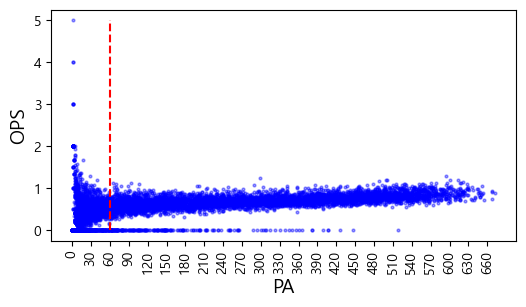

In [314]:
import matplotlib.pyplot as plt

# 타석 열에서 최소값 계산
min_pa = int(batter_df['타석'].min())

# 타석 열에서 최대값 계산
max_pa = int(batter_df['타석'].max())

plt.figure(figsize=(6,3))
plt.plot('타석','OPS', data=batter_df, linestyle='none', marker='o', markersize=2, color='blue', alpha=0.4)
plt.xlabel('PA', fontsize=14)
plt.ylabel('OPS', fontsize=14)

# 타석 간격 설정 (최소값부터 최대값까지 30 간격)
plt.xticks(list(range(min_pa, max_pa, 30)),rotation=90)

plt.vlines(60,ymin=min(batter_df['OPS']), ymax=max(batter_df['OPS']),linestyle='dashed',colors='r')
plt.show()

In [315]:
Re_season_df = batter_df

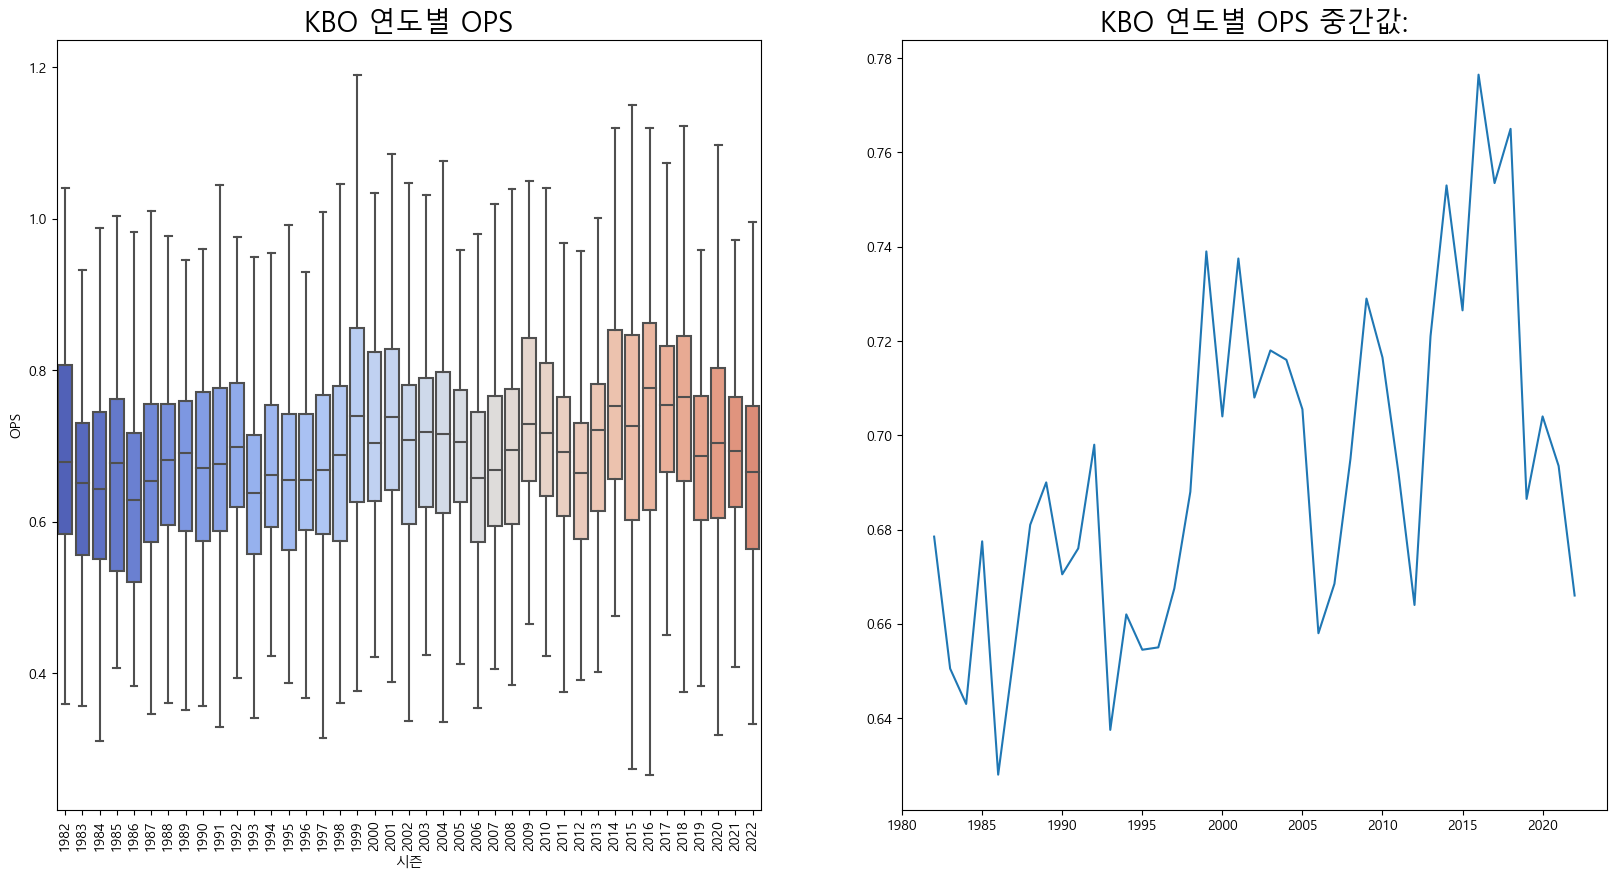

In [316]:
# 타석 피쳐값이 50 이상인 데이터 필터링
Re_season_df_filtered = Re_season_df[Re_season_df['타석'] >= 50]

# 색상 팔레트 설정
palette = sns.color_palette("coolwarm", 50)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
g= sns.boxplot(x='시즌', y='OPS', data=Re_season_df_filtered, showfliers=False, palette=palette)
g.set_title('KBO 연도별 OPS', size=20)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(1,2,2)
plt.plot(Re_season_df_filtered.groupby('시즌')['OPS'].median())
plt.title('KBO 연도별 OPS 중간값:', size=20)
plt.show()

In [317]:
result = Re_season_df_filtered

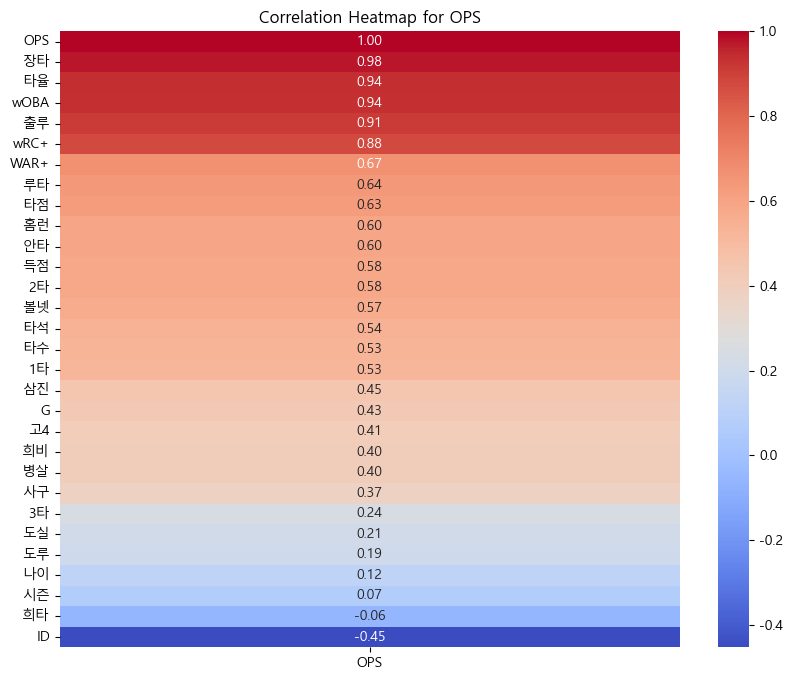

In [318]:
# 'OPS' 피처에 대한 상관 관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(result.corr()[['OPS']].sort_values(by='OPS', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for OPS')
plt.show()

In [319]:
# Find correlations with the target and sort
correlations = result.corr()['OPS'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(11))
print('\nMost Negative Correlations:\n', correlations.head(11))

Most Positive Correlations:
 안타      0.595192
홈런      0.596161
타점      0.628218
루타      0.640443
WAR+    0.668515
wRC+    0.879829
출루      0.914393
wOBA    0.936449
타율      0.941110
장타      0.975965
OPS     1.000000
Name: OPS, dtype: float64

Most Negative Correlations:
 ID   -0.452731
희타   -0.060163
시즌    0.071274
나이    0.123868
도루    0.194263
도실    0.211058
3타    0.243994
사구    0.371315
병살    0.402097
희비    0.403840
고4    0.408388
Name: OPS, dtype: float64


Top 5. High correlation with 'OPS' Pair Plot


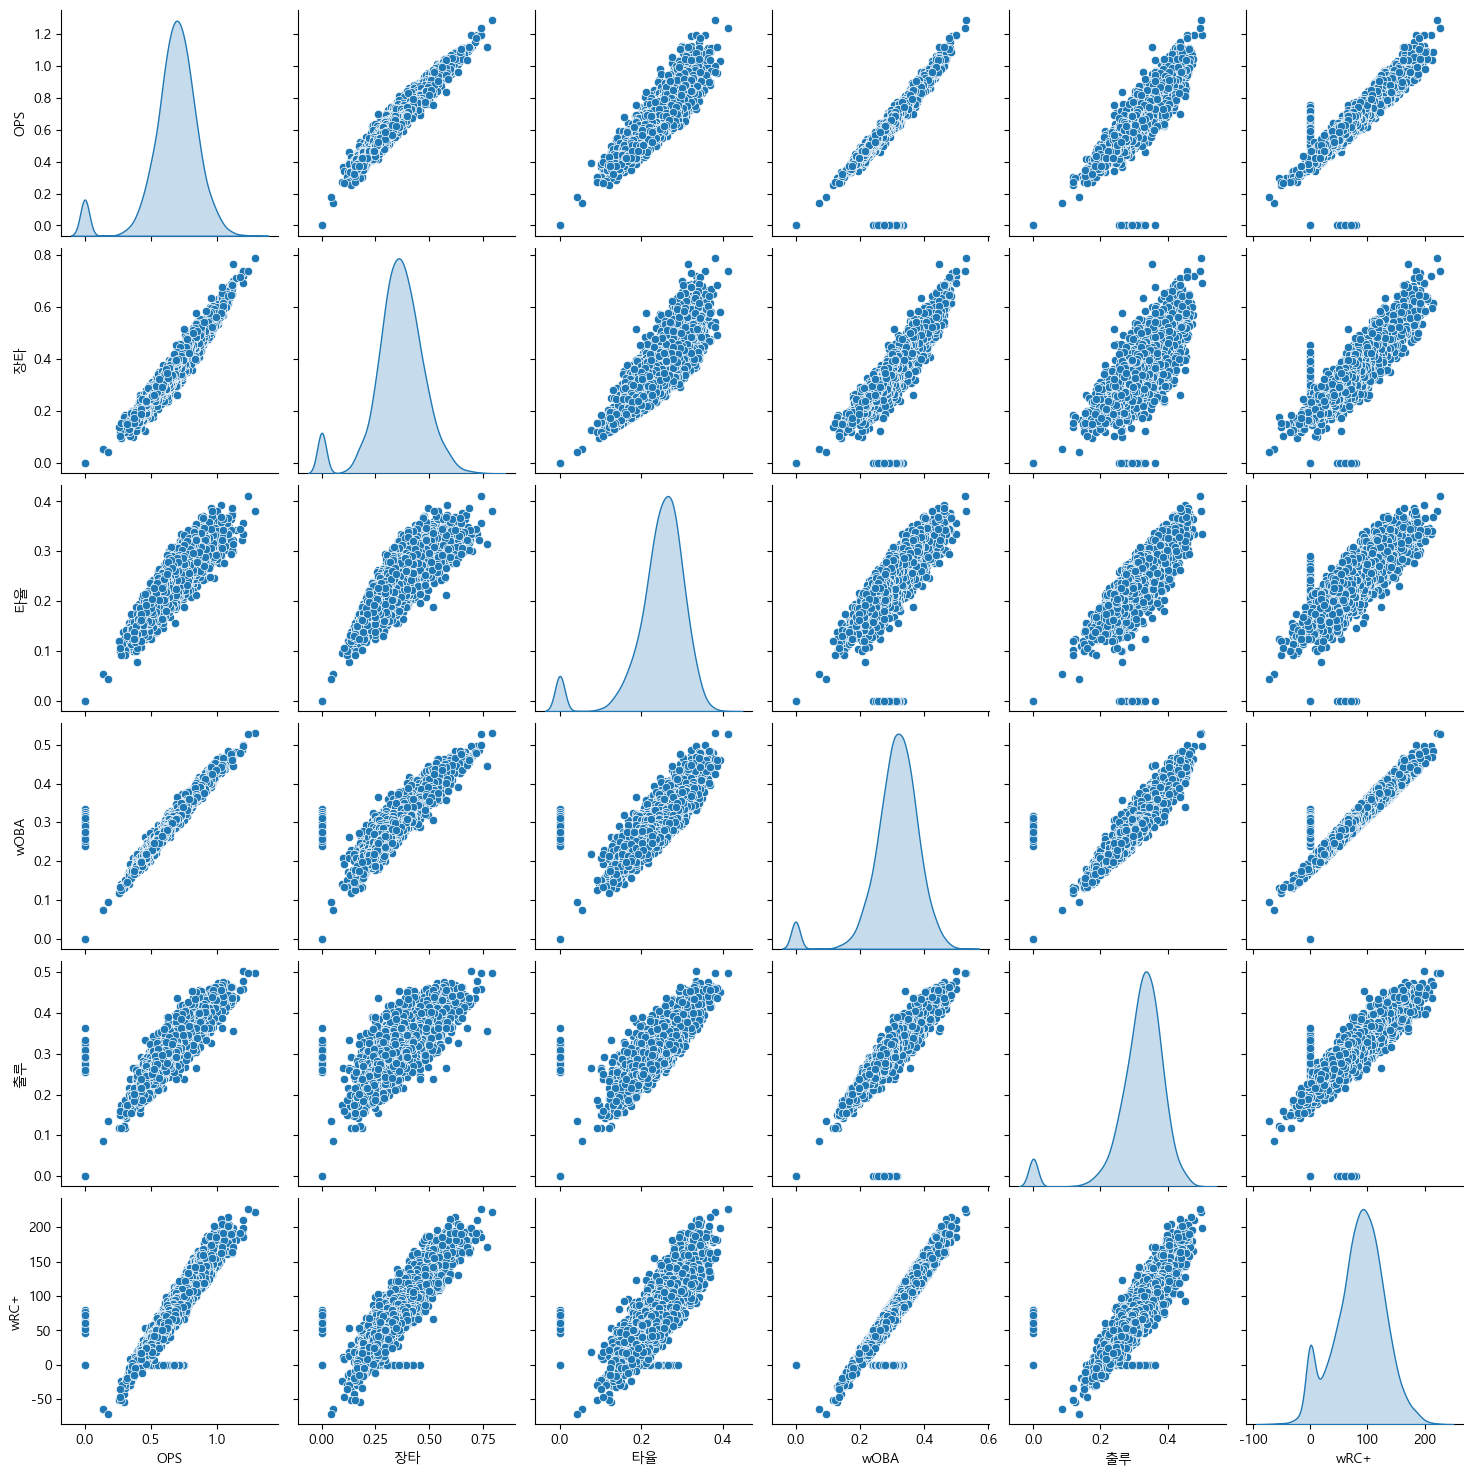

In [320]:
#Top 5. High correlation with 'OPS' Pair Plot
print("Top 5. High correlation with 'OPS' Pair Plot")
high_corr = result.loc[:,list(correlations.tail(6)[::-1].index)]
sns.pairplot(high_corr,diag_kind='kde')
plt.show()

Top5. Low correlation with 'OPS' Pair Plot


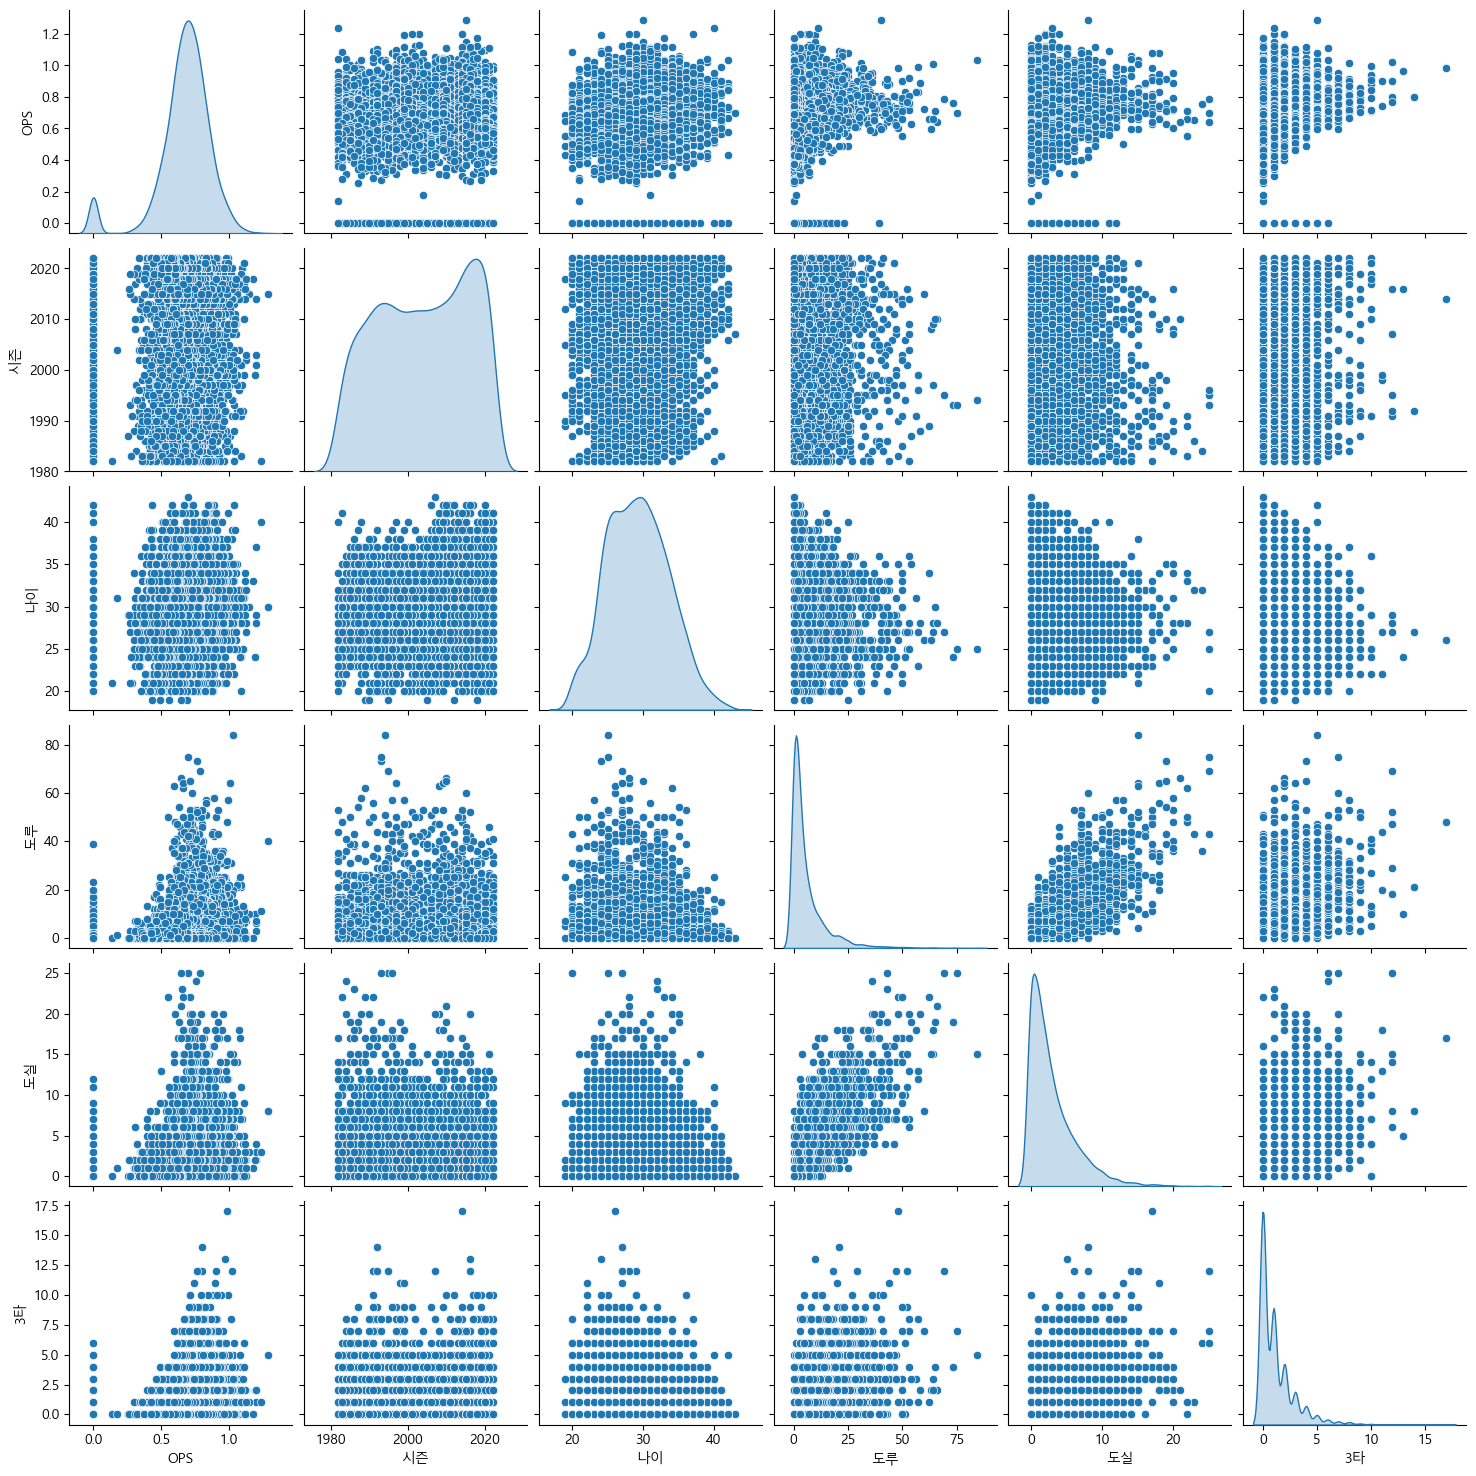

In [321]:
# Top5. Low correlation with 'OPS' Pair Plot
print("Top5. Low correlation with 'OPS' Pair Plot")
low_corr = result.loc[:,['OPS']+list(correlations.head(7)[2:].index)]
sns.pairplot(low_corr,diag_kind='kde')
plt.show()

Text(0.5, 1.0, '포지션별 OPS violinplot')

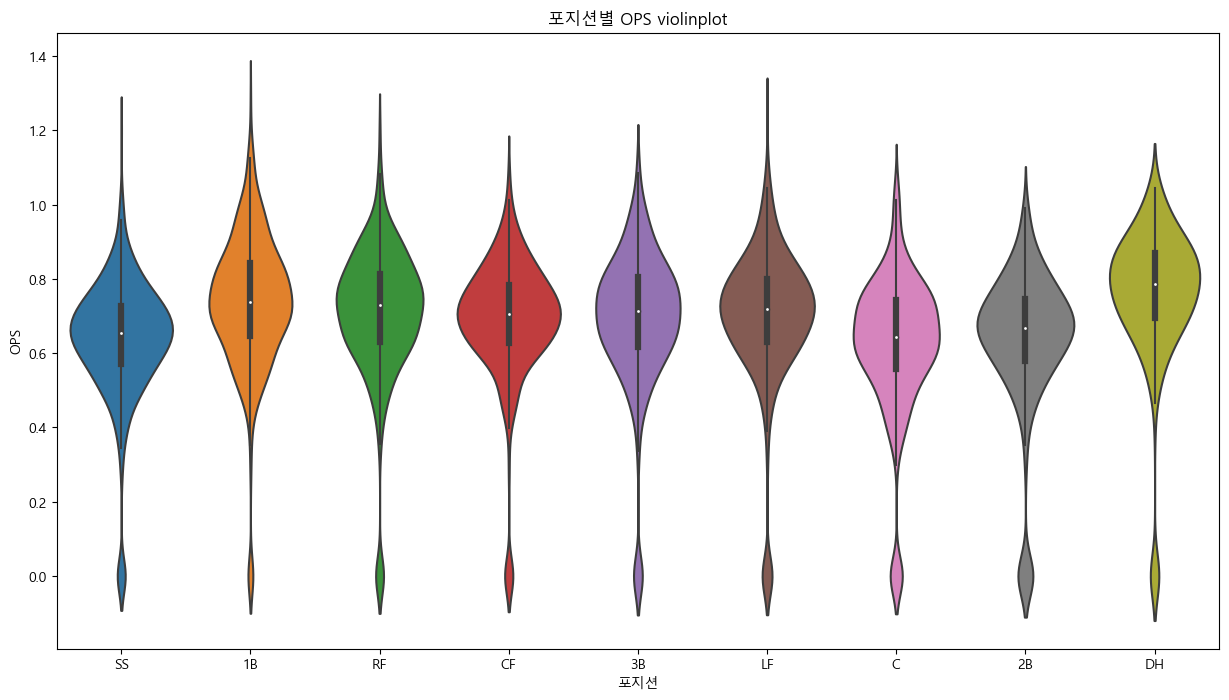

In [322]:
# dtype이 object인 것과 OPS 추출
result_obj=result.loc[:,list(result.columns[result.dtypes=='object'])+['OPS']]

# 포지션별 OPS violinplot 그려보기 -- 포수는 땜빵경기가 많아서 분포범위가 상대적으로 많이 큼
plt.figure(figsize=(15,8))
sns.violinplot(x='포지션',y='OPS',data=result_obj)
plt.title("포지션별 OPS violinplot")

In [323]:
# 사용 features 명시
infos = ['ID','이름','생일','팀','시즌','포지션','나이']
stats = ['타율','출루','장타','OPS','wOBA','wRC+']

In [324]:
# 해당 시즌 이전까지의 누적 기록
def get_cumulative(player_id, season, stat=stats ,df=result):
    try:
        result_cum = df[(df['ID']==player_id) & (df['시즌'] < season)][stat]
        result_cum = result_cum.mean()
        
    except:
        result_cum = [np.nan for i in stat]
        result_cum = pd.Series(result_cum)
    
    return result_cum

In [325]:
# 모든 stats에 대한 누적 stat
stats_cum = [i + '_누적' for i in stats]

In [326]:
# 누적 stat 데이터프레임에 반영
result[stats_cum] = result.apply(lambda x: get_cumulative(x['ID'], x['시즌']), axis=1)

C:\Users\kimms\anaconda3\envs\test\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [327]:
# lag stat (직전 몇년의 기록)
def get_lag(player_id, season, lag, stat=stats, df=result):
    try:
        result_lag = df[(df['ID']==player_id)&(df['시즌'] == season-lag)][stat].values[0]
        result_lag = pd.Series(result_lag)
        
    except:
        result_lag = [np.nan for i in stat]
        result_lag = pd.Series(result_lag)
        
    return result_lag

In [328]:
# 직전 1,2,3년의 기록
stats_lag1 = [i + '_LAG1' for i in stats]
stats_lag2 = [i + '_LAG2' for i in stats]
stats_lag3 = [i + '_LAG3' for i in stats]

In [329]:
# lag1
result[stats_lag1] = result.apply(lambda x: get_lag(x['ID'],x['시즌'], lag=1), axis=1)

In [330]:
# lag2
result[stats_lag2] = result.apply(lambda x: get_lag(x['ID'],x['시즌'], lag=2), axis=1)

In [331]:
# lag3
result[stats_lag3] = result.apply(lambda x: get_lag(x['ID'],x['시즌'], lag=3), axis=1)

In [332]:
# 내년 기록 (OPS, 장타, 출루)
# 데이터 프레임의 정답 셋 만들기 위함

def get_next_year(player_id, season, stat=['장타','출루','OPS'],df=result):
    try:
        result = df[(df['ID']==player_id)&(df['시즌']==season+1)][stat].values[0]
        result = pd.Series(result)
    except:
        result = [np.nan for i in stat]
        result = pd.Series(result)
        
    return result

In [333]:
# 장타, 출루, OPS의 내년 기록
stats_next = [i + '_NEXT' for i in ['장타', '출루', 'OPS']]
result[stats_next] = result.apply(lambda x: get_next_year(x['ID'], x['시즌']), axis=1)

In [334]:
# 변환 데이터 저장
# result.to_csv("data/statiz_v2.csv")

모델링

In [335]:
# 출력 할 때 마다, 기존 출력물들은 제거해주는 모듈
from IPython.display import clear_output

In [336]:
# 모델 모듈
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [337]:
df = result.fillna(-1) # nan값 -1로 impute 
df = df[df['OPS_NEXT'] > 0]

In [338]:
df = pd.concat([df, pd.get_dummies(df['포지션'], drop_first=True)], axis=1) # 포지션 dummy variable로 변환

In [339]:
df

,ID,이름,생일,팀,시즌,포지션,나이,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+,1타,타율_누적,출루_누적,장타_누적,OPS_누적,wOBA_누적,wRC+_누적,타율_LAG1,출루_LAG1,장타_LAG1,OPS_LAG1,wOBA_LAG1,wRC+_LAG1,타율_LAG2,출루_LAG2,장타_LAG2,OPS_LAG2,wOBA_LAG2,wRC+_LAG2,타율_LAG3,출루_LAG3,장타_LAG3,OPS_LAG3,wOBA_LAG3,wRC+_LAG3,장타_NEXT,출루_NEXT,OPS_NEXT,1B,2B,3B,C,CF,DH,LF,RF,SS
0,0,이종범,1970-08-15,해,1994,SS,25,124.0,561.0,499.0,113.0,196.0,27.0,5.0,19.0,290.0,77.0,84.0,15.0,51.0,6.0,14.0,31.0,2.0,1.0,4.0,0.393,0.452,0.581,1.033,0.462,198.3,11.77,145.0,0.280000,0.331000,0.432000,0.762000,0.350000,127.400000,0.280,0.331,0.432,0.762,0.350,127.4,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,0.586,0.397,0.983,0,0,0,0,0,0,0,0,1
1,1,테임즈,1986-11-10,N,2015,1B,30,142.0,595.0,472.0,130.0,180.0,42.0,5.0,47.0,373.0,140.0,40.0,8.0,103.0,13.0,11.0,91.0,7.0,0.0,7.0,0.381,0.498,0.790,1.288,0.530,222.3,10.71,86.0,0.343000,0.422000,0.688000,1.111000,0.464000,168.300000,0.343,0.422,0.688,1.111,0.464,168.3,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,0.679,0.427,1.106,1,0,0,0,0,0,0,0,0
2,2,심정수,1975-05-05,현,2003,RF,29,133.0,601.0,460.0,110.0,154.0,16.0,1.0,53.0,331.0,142.0,6.0,2.0,124.0,9.0,17.0,63.0,14.0,0.0,8.0,0.335,0.478,0.720,1.197,0.498,210.7,10.19,84.0,0.276444,0.356778,0.503000,0.859667,0.377111,133.700000,0.321,0.404,0.643,1.047,0.440,177.7,0.294,0.404,0.491,0.895,0.403,135.7,0.304,0.400,0.551,0.951,0.413,149.9,0.480,0.385,0.864,0,0,0,0,0,0,0,1,0
4,0,이종범,1970-08-15,해,1996,SS,27,113.0,525.0,449.0,94.0,149.0,28.0,1.0,25.0,254.0,76.0,57.0,12.0,67.0,7.0,15.0,39.0,4.0,0.0,2.0,0.332,0.425,0.566,0.991,0.440,184.6,9.52,95.0,0.333000,0.393333,0.533000,0.926000,0.414667,169.200000,0.326,0.397,0.586,0.983,0.432,181.9,0.393,0.452,0.581,1.033,0.462,198.3,0.280,0.331,0.432,0.762,0.350,127.4,0.581,0.428,1.009,0,0,0,0,0,0,0,0,1
6,4,이승엽,1976-08-18,삼,2002,1B,27,133.0,617.0,511.0,123.0,165.0,42.0,2.0,47.0,352.0,126.0,1.0,2.0,89.0,15.0,5.0,109.0,11.0,0.0,2.0,0.323,0.436,0.689,1.125,0.472,198.5,8.96,74.0,0.302143,0.395429,0.585143,0.980000,0.421000,160.471429,0.276,0.412,0.605,1.017,0.434,155.1,0.293,0.404,0.604,1.008,0.428,157.3,0.323,0.458,0.733,1.190,0.486,191.8,0.699,0.428,1.127,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,436,송인호,1968-12-27,해,1994,2B,27,76.0,178.0,153.0,12.0,20.0,0.0,0.0,1.0,23.0,10.0,7.0,1.0,5.0,3.0,0.0,27.0,2.0,17.0,0.0,0.131,0.174,0.150,0.324,0.145,-19.0,-1.45,19.0,0.244333,0.321667,0.362333,0.683667,0.317667,92.666667,0.174,0.258,0.242,0.499,0.238,46.1,0.233,0.311,0.326,0.637,0.298,74.2,0.326,0.396,0.519,0.915,0.417,157.7,0.224,0.288,0.511,0,1,0,0,0,0,0,0,0
10031,525,조동화,1981-03-22,S,2009,RF,29,102.0,191.0,169.0,22.0,30.0,4.0,3.0,0.0,40.0,8.0,7.0,3.0,8.0,3.0,0.0,49.0,2.0,11.0,0.0,0.178,0.228,0.237,0.465,0.207,1.8,-1.52,23.0,0.253750,0.322750,0.311000,0.633500,0.284000,67.275000,0.279,0.357,0.332,0.689,0.316,86.8,0.272,0.352,0.321,0.673,0.312,86.6,0.201,0.266,0.281,0.547,0.246,45.7,0.316,0.332,0.648,0,0,0,0,0,0,0,1,0
10034,2084,나종덕,1998-03-16,롯,2018,C,21,106.0,203.0,177.0,15.0,22.0,3.0,0.0,2.0,31.0,11.0,0.0,0.0,12.0,5.0,0.0,85.0,2.0,9.0,0.0,0.124,0.201,0.175,0.376,0.175,-15.1,-1.71,17.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,0.195,0.188,0.383,0,0,0,1,0,0,0,0,0
10035,0,이종범,1970-08-15,K,2007,RF,38,84.0,282.0,253.0,23.0,44.0,6.0,0.0,1.0,53.0,18.0,3.0,2.0,13.0,2.0,0.0,25.0,6.0,10.0,4.0,0.174,0.217,0.209,0.426,0.199,8.0,-2.04,37.0,0.310636,0.384818,0.498091,0.882727,0.392273,144.918182,0.242,0.302,0.310,0.611,0.282,73.0,0.312,0.393,0.421,0.814,0.374,127.8,0.260,0.350,0.422,0.772,0.349,106.2,0.379,0

학습

In [340]:
# 사용 features 명시
infos = ['ID','이름','생일','팀','시즌','포지션','나이']
stats = ['타율','출루','장타','OPS','wOBA','wRC+']

In [341]:
# 사용 features 명시
#infos = ['ID','이름','생일','팀','시즌','포지션','나이']
#stats = ['G','타수','득점','안타','1타','2타','3타','홈런','루타','타점','도루','도실','볼넷','사구','고4','삼진'\
#        ,'병살','희타','희비','타율','출루','장타','OPS']

In [342]:
# 누적 및 lag stat features 이름
stats_cum = [i + '_누적' for i in stats]
stats_lag1 = [i + '_LAG1' for i in stats]
stats_lag2 = [i + '_LAG2' for i in stats]
stats_lag3 = [i + '_LAG3' for i in stats]

In [343]:
# X features와 y feature 정리
stats_position = ['2B', '3B', 'C', 'CF', 'DH', 'LF', 'RF', 'SS']
X_cols = stats + stats_cum + stats_lag1 + stats_lag2 + stats_position + ['나이']
y_cols = ['OPS_NEXT']

In [344]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [382]:
train = df[df['시즌'] < 2022].reset_index(drop=True)
test = df[df['시즌'] == 2021].reset_index(drop=True)
    
trainX = train[X_cols]
trainY= train[y_cols]

X_test = test[X_cols]
y_test = test[y_cols]

In [383]:
train.head(3)

,ID,이름,생일,팀,시즌,포지션,나이,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+,1타,타율_누적,출루_누적,장타_누적,OPS_누적,wOBA_누적,wRC+_누적,타율_LAG1,출루_LAG1,장타_LAG1,OPS_LAG1,wOBA_LAG1,wRC+_LAG1,타율_LAG2,출루_LAG2,장타_LAG2,OPS_LAG2,wOBA_LAG2,wRC+_LAG2,타율_LAG3,출루_LAG3,장타_LAG3,OPS_LAG3,wOBA_LAG3,wRC+_LAG3,장타_NEXT,출루_NEXT,OPS_NEXT,1B,2B,3B,C,CF,DH,LF,RF,SS
0,0,이종범,1970-08-15,해,1994,SS,25,124.0,561.0,499.0,113.0,196.0,27.0,5.0,19.0,290.0,77.0,84.0,15.0,51.0,6.0,14.0,31.0,2.0,1.0,4.0,0.393,0.452,0.581,1.033,0.462,198.3,11.77,145.0,0.280000,0.331000,0.432,0.762000,0.350000,127.4,0.280,0.331,0.432,0.762,0.350,127.4,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.0,0.586,0.397,0.983,0,0,0,0,0,0,0,0,1
1,1,테임즈,1986-11-10,N,2015,1B,30,142.0,595.0,472.0,130.0,180.0,42.0,5.0,47.0,373.0,140.0,40.0,8.0,103.0,13.0,11.0,91.0,7.0,0.0,7.0,0.381,0.498,0.790,1.288,0.530,222.3,10.71,86.0,0.343000,0.422000,0.688,1.111000,0.464000,168.3,0.343,0.422,0.688,1.111,0.464,168.3,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.0,0.679,0.427,1.106,1,0,0,0,0,0,0,0,0
2,2,심정수,1975-05-05,현,2003,RF,29,133.0,601.0,460.0,110.0,154.0,16.0,1.0,53.0,331.0,142.0,6.0,2.0,124.0,9.0,17.0,63.0,14.0,0.0,8.0,0.335,0.478,0.720,1.197,0.498,210.7,10.19,84.0,0.276444,0.356778,0.503,0.859667,0.377111,133.7,0.321,0.404,0.643,1.047,0.440,177.7,0.294,0.404,0.491,0.895,0.403,135.7,0.304,0.4,0.551,0.951,0.413,149.9,0.480,0.385,0.864,0,0,0,0,0,0,0,1,0


In [347]:
test

,ID,이름,생일,팀,시즌,포지션,나이,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+,1타,타율_누적,출루_누적,장타_누적,OPS_누적,wOBA_누적,wRC+_누적,타율_LAG1,출루_LAG1,장타_LAG1,OPS_LAG1,wOBA_LAG1,wRC+_LAG1,타율_LAG2,출루_LAG2,장타_LAG2,OPS_LAG2,wOBA_LAG2,wRC+_LAG2,타율_LAG3,출루_LAG3,장타_LAG3,OPS_LAG3,wOBA_LAG3,wRC+_LAG3,장타_NEXT,출루_NEXT,OPS_NEXT,1B,2B,3B,C,CF,DH,LF,RF,SS
0,33,홍창기,1993-11-21,L,2021,CF,29,144.0,651.0,524.0,103.0,172.0,26.0,2.0,4.0,214.0,52.0,23.0,8.0,110.0,15.0,4.0,95.0,6.0,0.0,2.0,0.328,0.456,0.408,0.865,0.417,152.6,6.98,140.0,0.279000,0.411000,0.417000,0.827000,0.384000,129.500000,0.279,0.411,0.417,0.827,0.384,129.5,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,0.355,0.390,0.745,0,0,0,0,1,0,0,0,0
1,3,이정후,1998-08-20,키,2021,CF,24,123.0,544.0,464.0,78.0,167.0,42.0,6.0,7.0,242.0,84.0,10.0,3.0,62.0,9.0,1.0,37.0,8.0,0.0,9.0,0.360,0.438,0.522,0.959,0.441,165.2,6.73,112.0,0.337000,0.397500,0.468500,0.866000,0.388250,129.325000,0.333,0.397,0.524,0.921,0.406,142.8,0.336,0.386,0.456,0.842,0.386,135.1,0.355,0.412,0.477,0.889,0.391,127.4,0.575,0.421,0.996,0,0,0,0,1,0,0,0,0
2,26,최정,1987-02-28,S,2021,3B,35,134.0,555.0,436.0,92.0,121.0,17.0,1.0,35.0,245.0,100.0,8.0,6.0,84.0,22.0,3.0,102.0,9.0,1.0,12.0,0.278,0.410,0.562,0.972,0.431,155.9,6.14,68.0,0.285250,0.381438,0.511750,0.893250,0.393813,135.056250,0.270,0.392,0.538,0.930,0.409,138.8,0.292,0.399,0.519,0.918,0.411,148.9,0.244,0.368,0.547,0.915,0.385,120.3,0.505,0.386,0.891,0,0,1,0,0,0,0,0,0
3,37,양의지,1987-06-05,N,2021,DH,35,141.0,570.0,480.0,81.0,156.0,29.0,2.0,30.0,279.0,111.0,2.0,1.0,69.0,11.0,5.0,60.0,12.0,0.0,10.0,0.325,0.414,0.581,0.995,0.443,165.4,5.74,95.0,0.304636,0.384455,0.490455,0.874909,0.387636,132.318182,0.328,0.400,0.603,1.003,0.432,154.3,0.354,0.438,0.574,1.012,0.452,179.8,0.358,0.427,0.585,1.013,0.431,160.5,0.480,0.380,0.861,0,0,0,0,0,1,0,0,0
4,103,구자욱,1993-02-12,삼,2021,RF,29,139.0,610.0,543.0,107.0,166.0,30.0,10.0,22.0,282.0,88.0,27.0,4.0,48.0,6.0,3.0,98.0,9.0,1.0,12.0,0.306,0.361,0.519,0.881,0.394,134.0,5.01,104.0,0.318167,0.387333,0.510500,0.898000,0.396000,131.266667,0.307,0.385,0.478,0.863,0.387,126.6,0.267,0.327,0.444,0.771,0.348,107.6,0.333,0.392,0.533,0.926,0.398,131.9,0.399,0.338,0.736,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2163,박대온,1995-08-28,N,2021,C,27,42.0,95.0,85.0,4.0,18.0,1.0,0.0,0.0,19.0,5.0,0.0,0.0,4.0,0.0,0.0,21.0,0.0,4.0,2.0,0.212,0.242,0.224,0.465,0.216,18.3,-0.38,17.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,0.236,0.192,0.429,0,0,0,1,0,0,0,0,0
118,461,김휘집,2002-01-01,키,2021,3B,20,34.0,89.0,70.0,9.0,9.0,1.0,0.0,1.0,13.0,8.0,1.0,0.0,13.0,2.0,0.0,23.0,0.0,3.0,1.0,0.129,0.279,0.186,0.465,0.238,33.6,-0.38,7.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,0.336,0.326,0.662,0,0,1,0,0,0,0,0,0
119,1861,이도윤,1996-10-07,한,2021,SS,26,56.0,68.0,63.0,5.0,11.0,0.0,0.0,0.0,11.0,2.0,1.0,2.0,4.0,0.0,0.0,18.0,1.0,1.0,0.0,0.175,0.224,0.175,0.399,0.198,6.6,-0.45,11.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,0.248,0.213,0.461,0,0,0,0,0,0,0,0,1
120,940,박정현,2001-07-27,한,2021,SS,21,33.0,120.0,107.0,10.0,21.0,4.0,0.0,0.0,25.0,9.0,1.0,0.0,9.0,0.0,0.0,32.0,1.0,3.0,1.0,0.196,0.256,0.234,0.490,0.235,30.9,-0.52,17.0,0.279000,0.313000,0.377000,0.690000,0.317000,84.200000,0.279,0.313,0.377,0.690,0.317,84.2,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,

Linear Regression

In [351]:
# Linear Regression 모델 초기화
lr_model = LinearRegression()

# 모델 훈련
lr_model.fit(trainX, trainY)

# 테스트 세트에서 성능 평가
test_score = lr_model.score(X_test, y_test)
print("Test Score:", test_score)

# 테스트 세트에서 예측 수행
y_pred = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lr = r2_score(y_test, y_pred)
print("Root Mean Squared Error:", rmse_lr)
print("R-squared:", r2_lr)

Test Score: 0.21874791429308926
Root Mean Squared Error: 0.10688390452029589
R-squared: 0.21874791429308926


RF 모델

In [352]:
# Random Forest 모델 초기화
rf_model = RandomForestRegressor()

# 탐색할 하이퍼파라미터 그리드 생성
#param_grid = {
#    'n_estimators': [100, 300, 500, 1000],           # 트리의 개수
#    'max_depth': [1,3,5,10],  # 트리의 최대 깊이
#    'min_samples_split': [2, 5, 10],            # 내부 노드를 분할하는 데 필요한 최소 샘플 수
#    'min_samples_leaf': [1, 2, 4]               # 리프 노드에 필요한 최소 샘플 수
#}

param_grid = {
    'n_estimators': [300],           # 트리의 개수
    'max_depth': [5],  # 트리의 최대 깊이
    'min_samples_split': [2],            # 내부 노드를 분할하는 데 필요한 최소 샘플 수
    'min_samples_leaf': [4]               # 리프 노드에 필요한 최소 샘플 수
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(trainX, trainY)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델
best_rf_model = grid_search.best_estimator_

# 테스트 세트에서 성능 평가
test_score = best_rf_model.score(X_test, y_test)
print("Test Score:", test_score)

# 최적의 모델로 테스트 세트에서 예측 수행
y_pred = best_rf_model.predict(X_test)

# 평균 제곱근 오차(RMSE) 계산
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse_rf)

# 결정 계수(R²) 계산
r2_rf = r2_score(y_test, y_pred)
print("R-squared:", r2_rf)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\kimms\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Test Score: 0.26726606408879505
Root Mean Squared Error: 0.10351180184859253
R-squared: 0.26726606408879505


In [353]:
# GBDT 모델 초기화
gbdt_model = GradientBoostingRegressor()

# 탐색할 하이퍼파라미터 그리드 생성
#param_grid = {
##    'n_estimators': [100, 300, 500, 1000],           # 트리의 개수
 #   'learning_rate': [0.01, 0.05, 0.1],         # 학습률
 #   'max_depth': [10,30,50],                     # 트리의 최대 깊이
 #   'min_samples_split': [2, 5, 10],            # 내부 노드를 분할하는 데 필요한 최소 샘플 수
 #   'min_samples_leaf': [1, 2, 4]# 리프 노드에 필요한 최소 샘플 수
#}

# 탐색할 하이퍼파라미터 그리드 생성
param_grid = {
    'n_estimators': [300],           # 트리의 개수
    'learning_rate': [0.01],         # 학습률
    'max_depth': [10],                     # 트리의 최대 깊이
    'min_samples_split': [10],            # 내부 노드를 분할하는 데 필요한 최소 샘플 수
    'min_samples_leaf': [4]# 리프 노드에 필요한 최소 샘플 수
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(estimator=gbdt_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(trainX, trainY)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델
best_gbdt_model = grid_search.best_estimator_

# 테스트 세트에서 성능 평가
test_score = best_gbdt_model.score(X_test, y_test)
print("Test Score:", test_score)

# 최적의 모델로 테스트 세트에서 예측 수행
y_pred = best_gbdt_model.predict(X_test)

# 평균 제곱근 오차(RMSE) 계산
rmse_GBDT = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse_GBDT)

# 결정 계수(R²) 계산
r2_GBDT = r2_score(y_test, y_pred)
print("R-squared:", r2_GBDT)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\kimms\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found:  {'learning_rate': 0.01, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Test Score: 0.8266758804354777
Root Mean Squared Error: 0.05034382590584682
R-squared: 0.8266758804354777


XGB 하이퍼 파라미터 튜닝

In [354]:
# XGBoost 모델 초기화
xgb_model = XGBRegressor()

# 탐색할 하이퍼파라미터 그리드 생성
param_grid = {
    'n_estimators': [100],  # 트리의 개수
    'max_depth': [10],             # 트리의 최대 깊이
    'learning_rate': [0.05],  # 학습률
    'min_child_weight': [5]       # 최소한의 자식 노드에서 필요한 가중치 합
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(trainX, trainY)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델
best_xgb_model = grid_search.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 100}


In [355]:
# 테스트 세트에서 성능 평가
test_score = best_xgb_model.score(X_test, y_test)
print("Test Score:", test_score)

# 최적의 모델로 테스트 세트에서 예측 수행
y_pred = best_xgb_model.predict(X_test)

# 평균 제곱 오차(MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# 평균 제곱근 오차(RMSE) 계산
rmse_XGB = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_XGB)

# 결정 계수(R²) 계산
r2_XGB = r2_score(y_test, y_pred)
print("R-squared:", r2_XGB)

Test Score: 0.8540736410865608
Mean Squared Error: 0.002133866165507291
Root Mean Squared Error: 0.04619378925253146
R-squared: 0.8540736410865608


LGBM 하이퍼 파리미터

In [356]:
from lightgbm import LGBMRegressor

# LightGBM 모델 초기화
lgbm_model = LGBMRegressor()

# 탐색할 하이퍼파라미터 그리드 생성
#param_grid = {
##    'num_leaves': [10,100, 300, 500, 1000],  # 리프의 개수
 #   'max_depth': [10, 30],               # 트리의 최대 깊이
 #   'learning_rate': [0.01, 0.05, 0.1, 0.2], # 학습률
 #   'min_child_weight': [1, 3, 5]            # 최소한의 자식 노드에서 필요한 가중치 합
#}

# 탐색할 하이퍼파라미터 그리드 생성
param_grid = {
    'num_leaves': [100],  # 리프의 개수
    'max_depth': [10],               # 트리의 최대 깊이
    'learning_rate': [0.05], # 학습률
    'min_child_weight': [1]            # 최소한의 자식 노드에서 필요한 가중치 합
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(trainX, trainY)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델
best_lgbm_model = grid_search.best_estimator_

# 테스트 세트에서 성능 평가
test_score = best_lgbm_model.score(X_test, y_test)
print("Test Score:", test_score)

# 최적의 모델로 테스트 세트에서 예측 수행
y_pred = best_lgbm_model.predict(X_test)

# 평균 제곱근 오차(RMSE) 계산
rmse_LGBM = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse_LGBM)

# 결정 계수(R²) 계산
r2_LGBM = r2_score(y_test, y_pred)
print("R-squared:", r2_LGBM)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 1, 'num_leaves': 100}
Test Score: 0.641930331761455
Root Mean Squared Error: 0.07236032061160434
R-squared: 0.641930331761455


SVM(SVR)

In [357]:
# SVM 모델 초기화
svm_model = SVR()

# 탐색할 하이퍼파라미터 그리드 생성
param_grid = {
    'kernel': ['linear', 'rbf', 'sigmoid'],  # 커널 유형
    'C': [0.1, 0.5],                           # 규제 매개변수
    'gamma': ['auto'],                        # 가우시안 커널 계수
    'epsilon': [0.01, 0.1, 0.2, 0.3]                         # 엡실론
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(trainX, trainY)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델
best_svm_model = grid_search.best_estimator_

# 테스트 세트에서 성능 평가
test_score = best_svm_model.score(X_test, y_test)
print("Test Score:", test_score)

# 최적의 모델로 테스트 세트에서 예측 수행
y_pred = best_svm_model.predict(X_test)

# 평균 제곱근 오차(RMSE) 계산
rmse_SVM = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse_SVM)

# 결정 계수(R²) 계산
r2_SVM = r2_score(y_test, y_pred)
print("R-squared:", r2_SVM)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\kimms\anaconda3\envs\test\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found:  {'C': 0.1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
Test Score: 0.2507211726753912
Root Mean Squared Error: 0.1046739096937361
R-squared: 0.2507211726753912


KNN

In [358]:
# KNN 모델 초기화
knn_model = KNeighborsRegressor()

# 탐색할 하이퍼파라미터 그리드 생성
param_grid = {
    'n_neighbors': [3, 5, 7,11,15],         # 이웃의 수
    'weights': ['uniform', 'distance'],  # 가중치 함수
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]                           # 거리 측정 방법 (1: 맨하탄 거리, 2: 유클리디안 거리)
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(trainX, trainY)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델
best_knn_model = grid_search.best_estimator_

# 테스트 세트에서 성능 평가
test_score = best_knn_model.score(X_test, y_test)
print("Test Score:", test_score)

# 최적의 모델로 테스트 세트에서 예측 수행
y_pred = best_knn_model.predict(X_test)

# 평균 제곱근 오차(RMSE) 계산
rmse_KNN = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse_KNN)

# 결정 계수(R²) 계산
r2_KNN = r2_score(y_test, y_pred)
print("R-squared:", r2_KNN)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best parameters found:  {'algorithm': 'auto', 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}
Test Score: 0.3287918252227019
Root Mean Squared Error: 0.09907072339067272
R-squared: 0.3287918252227019


LSTM

In [384]:
# 필요한 열만 선택
selected_features = ['타율','출루', '장타', 'OPS', 'wOBA', 'wRC+', '타율_누적',
                     '출루_누적', '장타_누적', 'OPS_누적', 'wOBA_누적', 'wRC+_누적', '타율_LAG1',
                     '출루_LAG1', '장타_LAG1', 'OPS_LAG1', 'wOBA_LAG1', 'wRC+_LAG1',
                     '타율_LAG2', '출루_LAG2', '장타_LAG2', 'OPS_LAG2', 'wOBA_LAG2',
                     'wRC+_LAG2', '타율_LAG3', '출루_LAG3', '장타_LAG3', 'OPS_LAG3',
                     'wOBA_LAG3', 'wRC+_LAG3', '장타_NEXT', '출루_NEXT', 'OPS_NEXT']

train = train[selected_features]

# 결측치 제거
train.dropna(inplace=True)

# 특성과 타겟 분리
X = train.drop(columns=['OPS_NEXT'])
y = train['OPS_NEXT']

# 데이터 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# LSTM 입력 데이터 형태로 변환
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# 훈련 데이터와 테스트 데이터, 검증 데이터로 분할
X_train, X_temp, y_train, y_temp = train_test_split(X_lstm, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# LSTM 모델 초기화
lstm_model = Sequential()
lstm_model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dense(units=1))

# 모델 컴파일
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_val, y_val))

# Test 셋에서 Loss 계산
test_loss = lstm_model.evaluate(X_test, y_test)

# 테스트 세트에서 예측 수행
y_pred = lstm_model.predict(X_test)

# 평가 지표 계산
rmse_LSTM = np.sqrt(mean_squared_error(y_test, y_pred))
r2_LSTM = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse_LSTM)
print("R-squared:", r2_LSTM)

# 검증 손실값 출력
val_loss = history.history['val_loss']
print("Validation Loss:", val_loss)
print("Test Loss:", test_loss)

Epoch 1/100
103/103 [==============================] - 2s 6ms/step - loss: 0.0971 - val_loss: 0.0104
Epoch 2/100
103/103 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.0060
Epoch 3/100
103/103 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0026
Epoch 4/100
103/103 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 6.6526e-04
Epoch 5/100
103/103 [==============================] - 0s 3ms/step - loss: 6.0003e-04 - val_loss: 3.3836e-04
Epoch 6/100
103/103 [==============================] - 0s 3ms/step - loss: 3.3436e-04 - val_loss: 2.5090e-04
Epoch 7/100
103/103 [==============================] - 0s 3ms/step - loss: 2.2576e-04 - val_loss: 1.8468e-04
Epoch 8/100
103/103 [==============================] - 0s 3ms/step - loss: 1.9011e-04 - val_loss: 1.4418e-04
Epoch 9/100
103/103 [==============================] - 0s 3ms/step - loss: 1.3929e-04 - val_loss: 1.1068e-04
Epoch 10/100
103/103 [=========================

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

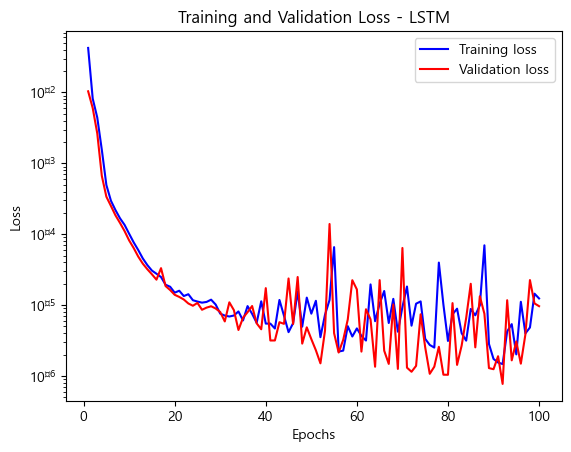

In [385]:
import matplotlib.pyplot as plt

# history 객체에서 훈련 손실과 검증 손실을 가져옵니다.
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 그래프를 그립니다.
#epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss') # 훈련 손실을 파란색 선으로 표시합니다.
plt.plot(epochs, val_loss, 'r', label='Validation loss') # 검증 손실을 빨간색 선으로 표시합니다.
plt.title('Training and Validation Loss - LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')  # 로그 스케일을 사용하여 표현합니다.


plt.legend()
plt.show()

In [386]:
# 특성과 타겟 분리
X = train.drop(columns=['OPS_NEXT'])
y = train['OPS_NEXT']

# 데이터 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# LSTM 입력 데이터 형태로 변환
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# 훈련 데이터와 테스트 데이터, 검증 데이터로 분할
X_train, X_temp, y_train, y_temp = train_test_split(X_lstm, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# LSTM 모델 초기화
lstm_model = Sequential()
lstm_model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dense(units=1))

# 모델 컴파일
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
history = lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_data=(X_val, y_val))

# Test 셋에서 Loss 계산
test_loss = lstm_model.evaluate(X_test, y_test)

# 테스트 세트에서 예측 수행
y_pred = lstm_model.predict(X_test)

# 평가 지표 계산
rmse_LSTM = np.sqrt(mean_squared_error(y_test, y_pred))
r2_LSTM = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse_LSTM)
print("R-squared:", r2_LSTM)

# 검증 손실값 출력
val_loss = history.history['val_loss']
print("Validation Loss:", val_loss)
print("Test Loss:", test_loss)

Epoch 1/30
103/103 [==============================] - 2s 6ms/step - loss: 0.0889 - val_loss: 0.0127
Epoch 2/30
103/103 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0068
Epoch 3/30
103/103 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 4/30
103/103 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 5.2358e-04
Epoch 5/30
103/103 [==============================] - 0s 3ms/step - loss: 4.2065e-04 - val_loss: 2.9443e-04
Epoch 6/30
103/103 [==============================] - 0s 3ms/step - loss: 2.8210e-04 - val_loss: 2.4066e-04
Epoch 7/30
103/103 [==============================] - 0s 3ms/step - loss: 2.3389e-04 - val_loss: 1.7168e-04
Epoch 8/30
103/103 [==============================] - 0s 3ms/step - loss: 1.5162e-04 - val_loss: 1.3003e-04
Epoch 9/30
103/103 [==============================] - 0s 3ms/step - loss: 1.3008e-04 - val_loss: 8.8337e-05
Epoch 10/30
103/103 [==============================] - 0

GRU

In [387]:
# 특성과 타겟 분리
X = train.drop(columns=['OPS_NEXT'])
y = train['OPS_NEXT']

# 데이터 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# LSTM 입력 데이터 형태로 변환
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# 훈련 데이터와 테스트 데이터, 검증 데이터로 분할
X_train, X_temp, y_train, y_temp = train_test_split(X_lstm, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# GRU 모델 초기화
gru_model = Sequential()
gru_model.add(GRU(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dense(units=1))

# 모델 컴파일
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
history = gru_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, 
                         validation_data=(X_val, y_val))

# Test 셋에서 Loss 계산
test_loss = gru_model.evaluate(X_test, y_test)

# 테스트 세트에서 예측 수행
y_pred = gru_model.predict(X_test)

# 평가 지표 계산
rmse_GRU = np.sqrt(mean_squared_error(y_test, y_pred))
r2_GRU = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse_GRU)
print("R-squared:", r2_GRU)

# 검증 손실값 출력
val_loss = history.history['val_loss']
print("Validation Loss:", val_loss)
print("Test Loss:", test_loss)

Epoch 1/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0601 - val_loss: 0.0049
Epoch 2/100
103/103 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 3/100
103/103 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 3.4477e-04
Epoch 4/100
103/103 [==============================] - 0s 3ms/step - loss: 3.3745e-04 - val_loss: 2.0847e-04
Epoch 5/100
103/103 [==============================] - 0s 3ms/step - loss: 1.8057e-04 - val_loss: 1.2082e-04
Epoch 6/100
103/103 [==============================] - 0s 3ms/step - loss: 1.2617e-04 - val_loss: 9.0397e-05
Epoch 7/100
103/103 [==============================] - 0s 3ms/step - loss: 9.6924e-05 - val_loss: 6.1365e-05
Epoch 8/100
103/103 [==============================] - 0s 2ms/step - loss: 6.7448e-05 - val_loss: 4.9146e-05
Epoch 9/100
103/103 [==============================] - 0s 2ms/step - loss: 4.9360e-05 - val_loss: 3.5553e-05
Epoch 10/100
103/103 [=================

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

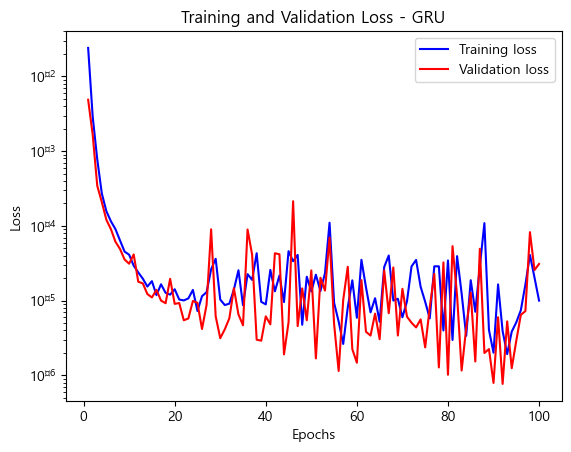

In [388]:
import matplotlib.pyplot as plt

# history 객체에서 훈련 손실과 검증 손실을 가져옵니다.
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 그래프를 그립니다.
#epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss') # 훈련 손실을 파란색 점으로 표시합니다.
plt.plot(epochs, val_loss, 'r', label='Validation loss') # 검증 손실을 빨간색 선으로 표시합니다.
plt.title('Training and Validation Loss - GRU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')  # 로그 스케일을 사용하여 표현합니다.


plt.legend()
plt.show()

In [389]:
# 특성과 타겟 분리
X = train.drop(columns=['OPS_NEXT'])
y = train['OPS_NEXT']

# 데이터 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# LSTM 입력 데이터 형태로 변환
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# 훈련 데이터와 테스트 데이터, 검증 데이터로 분할
X_train, X_temp, y_train, y_temp = train_test_split(X_lstm, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# GRU 모델 초기화
gru_model = Sequential()
gru_model.add(GRU(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dense(units=1))

# 모델 컴파일
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
history = gru_model.fit(X_train, y_train, epochs=18, batch_size=32, verbose=1, 
                         validation_data=(X_val, y_val))

# Test 셋에서 Loss 계산
test_loss = gru_model.evaluate(X_test, y_test)

# 테스트 세트에서 예측 수행
y_pred = gru_model.predict(X_test)

# 평가 지표 계산
rmse_GRU = np.sqrt(mean_squared_error(y_test, y_pred))
r2_GRU = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse_GRU)
print("R-squared:", r2_GRU)

# 검증 손실값 출력
val_loss = history.history['val_loss']
print("Validation Loss:", val_loss)
print("Test Loss:", test_loss)

Epoch 1/18
103/103 [==============================] - 1s 6ms/step - loss: 0.0812 - val_loss: 0.0082
Epoch 2/18
103/103 [==============================] - 0s 4ms/step - loss: 0.0061 - val_loss: 0.0033
Epoch 3/18
103/103 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 9.7502e-04
Epoch 4/18
103/103 [==============================] - 0s 3ms/step - loss: 6.7128e-04 - val_loss: 2.2893e-04
Epoch 5/18
103/103 [==============================] - 0s 3ms/step - loss: 2.0212e-04 - val_loss: 1.3163e-04
Epoch 6/18
103/103 [==============================] - 0s 2ms/step - loss: 1.1075e-04 - val_loss: 8.3272e-05
Epoch 7/18
103/103 [==============================] - 0s 3ms/step - loss: 7.7625e-05 - val_loss: 6.2855e-05
Epoch 8/18
103/103 [==============================] - 0s 3ms/step - loss: 5.7262e-05 - val_loss: 9.3993e-05
Epoch 9/18
103/103 [==============================] - 0s 3ms/step - loss: 6.4047e-05 - val_loss: 6.8185e-05
Epoch 10/18
103/103 [===========================

CNN-LSTM

In [392]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# 데이터 형태 재조정
X_cnn_lstm = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# 훈련 데이터와 테스트 데이터, 검증 데이터로 분할
X_train, X_temp, y_train, y_temp = train_test_split(X_cnn_lstm, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# CNN-LSTM 모델 초기화
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(LSTM(units=100))
cnn_lstm_model.add(Dense(units=1))

# 모델 컴파일
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
history = cnn_lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, 
                              validation_data=(X_val, y_val))

# Test 셋에서 Loss 계산
test_loss = cnn_lstm_model.evaluate(X_test, y_test)

# 테스트 세트에서 예측 수행
y_pred = cnn_lstm_model.predict(X_test)

# 평가 지표 계산
rmse_CNN_LSTM = np.sqrt(mean_squared_error(y_test, y_pred))
r2_CNN_LSTM = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse_CNN_LSTM)
print("R-squared:", r2_CNN_LSTM)

# 검증 손실값 출력
val_loss = history.history['val_loss']
print("Validation Loss:", val_loss)
print("Test Loss:", test_loss)

Epoch 1/100
103/103 [==============================] - 2s 8ms/step - loss: 0.0953 - val_loss: 0.0159
Epoch 2/100
103/103 [==============================] - 0s 4ms/step - loss: 0.0142 - val_loss: 0.0111
Epoch 3/100
103/103 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.0022
Epoch 4/100
103/103 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 4.1055e-04
Epoch 5/100
103/103 [==============================] - 0s 4ms/step - loss: 3.7461e-04 - val_loss: 2.5256e-04
Epoch 6/100
103/103 [==============================] - 0s 4ms/step - loss: 2.1312e-04 - val_loss: 1.2795e-04
Epoch 7/100
103/103 [==============================] - 0s 4ms/step - loss: 1.3949e-04 - val_loss: 1.8810e-04
Epoch 8/100
103/103 [==============================] - 0s 4ms/step - loss: 1.1554e-04 - val_loss: 7.5959e-05
Epoch 9/100
103/103 [==============================] - 0s 4ms/step - loss: 7.7909e-05 - val_loss: 6.6193e-05
Epoch 10/100
103/103 [=========================

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

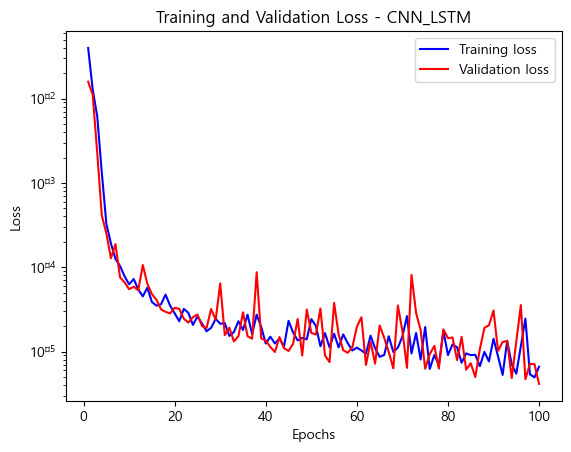

In [393]:
import matplotlib.pyplot as plt

# history 객체에서 훈련 손실과 검증 손실을 가져옵니다.
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 그래프를 그립니다.
#epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss') # 훈련 손실을 파란색 점으로 표시합니다.
plt.plot(epochs, val_loss, 'r', label='Validation loss') # 검증 손실을 빨간색 선으로 표시합니다.
plt.title('Training and Validation Loss - CNN_LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')  # 로그 스케일을 사용하여 표현합니다.


plt.legend()

plt.show()

--------------------------------------------------------------------------------------


In [394]:
# CNN-LSTM 모델 초기화
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(LSTM(units=100))
cnn_lstm_model.add(Dense(units=1))

# 모델 컴파일
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
history = cnn_lstm_model.fit(X_train, y_train, epochs=28, batch_size=32, verbose=1, 
                              validation_data=(X_val, y_val))

# Test 셋에서 Loss 계산
test_loss = cnn_lstm_model.evaluate(X_test, y_test)

# 테스트 세트에서 예측 수행
y_pred = cnn_lstm_model.predict(X_test)

# 평가 지표 계산
rmse_CNN_LSTM = np.sqrt(mean_squared_error(y_test, y_pred))
r2_CNN_LSTM = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse_CNN_LSTM)
print("R-squared:", r2_CNN_LSTM)

# 검증 손실값 출력
val_loss = history.history['val_loss']
print("Validation Loss:", val_loss)
print("Test Loss:", test_loss)

Epoch 1/28
103/103 [==============================] - 2s 9ms/step - loss: 0.0876 - val_loss: 0.0131
Epoch 2/28
103/103 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.0020
Epoch 3/28
103/103 [==============================] - 1s 5ms/step - loss: 6.1474e-04 - val_loss: 2.2543e-04
Epoch 4/28
103/103 [==============================] - 0s 4ms/step - loss: 2.3318e-04 - val_loss: 1.0283e-04
Epoch 5/28
103/103 [==============================] - 0s 4ms/step - loss: 9.7192e-05 - val_loss: 6.4976e-05
Epoch 6/28
103/103 [==============================] - 0s 5ms/step - loss: 7.5764e-05 - val_loss: 7.0902e-05
Epoch 7/28
103/103 [==============================] - 0s 4ms/step - loss: 8.2026e-05 - val_loss: 5.3436e-05
Epoch 8/28
103/103 [==============================] - 0s 4ms/step - loss: 5.2865e-05 - val_loss: 4.5427e-05
Epoch 9/28
103/103 [==============================] - 0s 4ms/step - loss: 4.4014e-05 - val_loss: 2.8210e-05
Epoch 10/28
103/103 [=======================

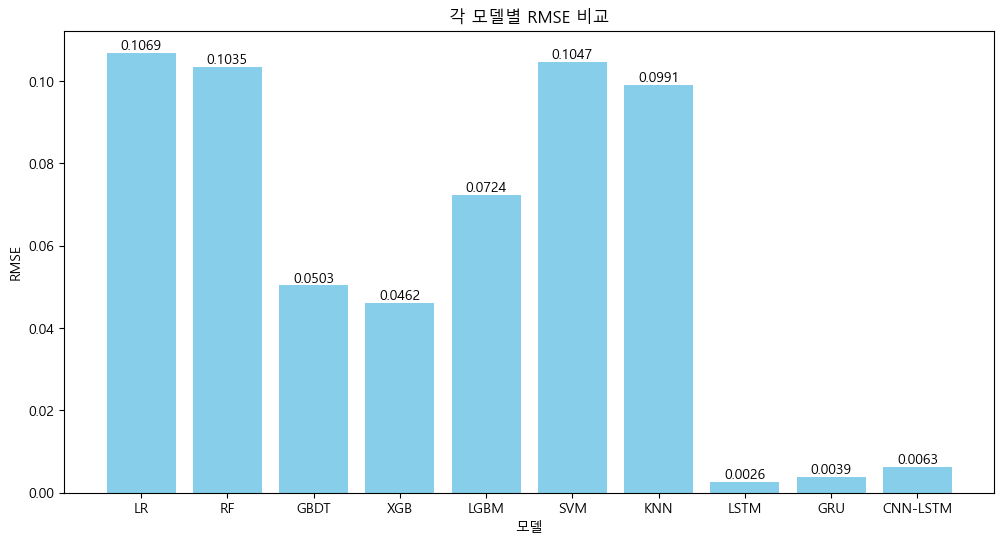

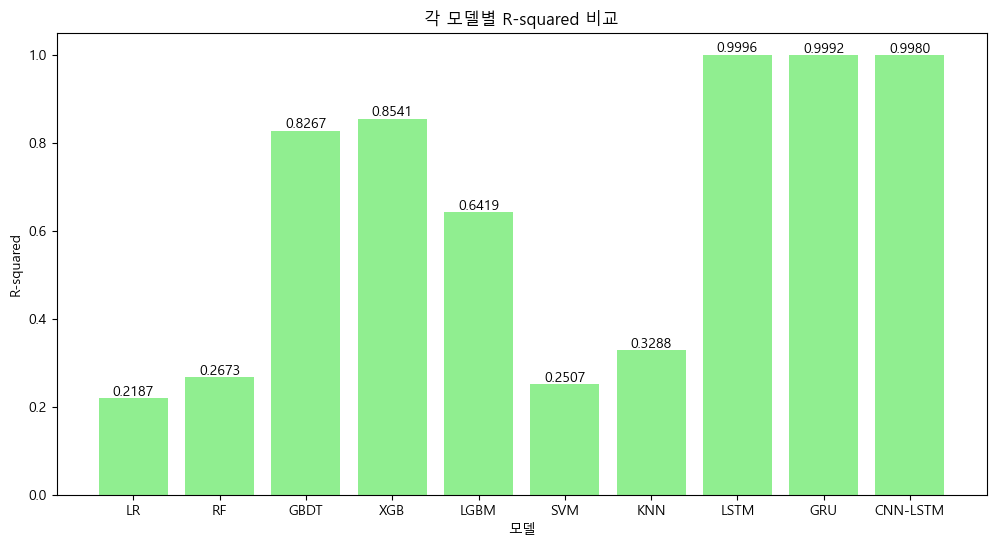

In [400]:
import matplotlib.pyplot as plt

models = ['LR', 'RF', 'GBDT', 'XGB', 'LGBM', 'SVM', 'KNN', 'LSTM', 'GRU', 'CNN-LSTM']
rmse_values = [rmse_lr, rmse_rf, rmse_GBDT, rmse_XGB, rmse_LGBM, rmse_SVM, rmse_KNN, rmse_LSTM, rmse_GRU, rmse_CNN_LSTM]
r2_values = [r2_lr, r2_rf, r2_GBDT, r2_XGB, r2_LGBM, r2_SVM, r2_KNN, r2_LSTM, r2_GRU, r2_CNN_LSTM]

plt.figure(figsize=(12, 6))
plt.bar(models, rmse_values, color='skyblue')
plt.xlabel('모델')
plt.ylabel('RMSE')
plt.title('각 모델별 RMSE 비교')

for i in range(len(models)):
    plt.text(x=i, y=rmse_values[i], s=f"{rmse_values[i]:.4f}", ha='center', va='bottom')

plt.show()

plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, color='lightgreen')
plt.xlabel('모델')
plt.ylabel('R-squared')
plt.title('각 모델별 R-squared 비교')

for i in range(len(models)):
    plt.text(x=i, y=r2_values[i], s=f"{r2_values[i]:.4f}", ha='center', va='bottom')

plt.show()